# 개미굴

## 문제

* 개미는(뚠뚠) 오늘도(뚠뚠) 열심히(뚠뚠) 일을 하네.

* 개미는 아무말도 하지 않지만 땀을 뻘뻘 흘리면서 매일 매일을 살길 위해서 열심히 일을 하네.

* 한 치 앞도(뚠뚠) 모르는(뚠뚠) 험한 이 세상(뚠뚠) 그렇지만(뚠뚠) 오늘도 행복한 개미들!

* 우리의 천재 공학자 윤수는 이 개미들이 왜 행복한지 궁금해졌다.

* 행복의 비결이 개미가 사는 개미굴에 있다고 생각한 윤수는 개미굴의 구조를 알아보기 위해 로봇 개미를 만들었다.

* 로봇 개미는 센서가 있어 개미굴의 각 층에 먹이가 있는 방을 따라 내려가다 더 이상 내려갈 수 없으면 그 자리에서 움직이지 않고 신호를 보낸다.

* 이 신호로 로봇 개미는 개미굴 각 층을 따라 내려오면서 알게 된 각 방에 저장된 먹이 정보를 윤수한테 알려줄 수 있다.



In [1]:
from IPython.display import Image

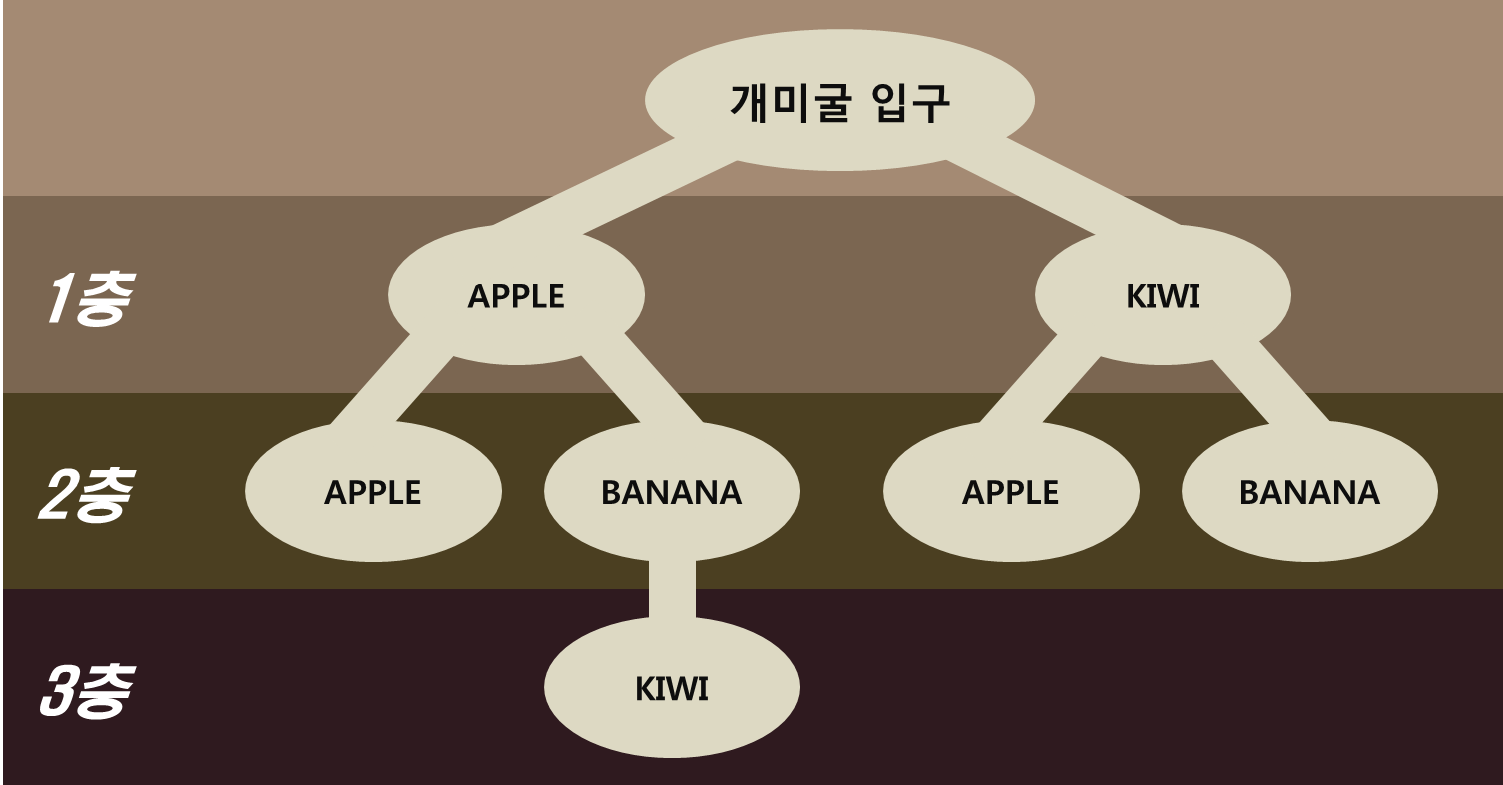

In [2]:
Image('../image/14725_개미굴.png')

* 로봇 개미 개발을 완료한 윤수는 개미굴 탐사를 앞두고 로봇 개미를 테스트 해보기 위해 위 그림의 개미굴에 로봇 개미를 투입했다. 로봇 개미의 수는 각 개미굴의 저장소를 모두 확인할 수 있을 만큼 넣는다.

* 다음은 로봇 개미들이 윤수에게 보내준 정보다.
    * KIWI BANANA
    * KIWI APPLE
    * APPLE APPLE
    * APPLE BANANA KIWI

* 공백을 기준으로 왼쪽부터 순서대로 로봇 개미가 각 층마다 지나온 방에 있는 먹이 이름을 뜻한다.

* 윤수는 로봇 개미들이 보내준 정보를 바탕으로 다음과 같이 개미굴의 구조를 손으로 그려봤다.

APPLE  
--APPLE  
--BANANA  
----KIWI  
KIWI  
--APPLE  
--BANANA  

* 개미굴의 각 층은 "--" 로 구분을 하였다. 또 같은 층에 여러 개의 방이 있을 때에는 사전 순서가 앞서는 먹이 정보가 먼저 나온다.

* 우리의 천재 공학자 윤수는 복잡한 개미굴들을 일일이 손으로 그리기 힘들어 우리에게 그려달라고 부탁했다.

* 한치 앞도 모르는 험한 이세상 그렇지만 오늘도 행복한 개미들!

* 행복의 비결을 알기 위해 윤수를 도와 개미굴이 어떤 구조인지 확인해보자.

## 입력

* 첫 번째 줄은 로봇 개미가 각 층을 따라 내려오면서 알게 된 먹이의 정보 개수 N (1 ≤ N ≤ 1000)개가 주어진다.

* 두 번째 줄부터 N+1 번째 줄까지, 각 줄의 시작은 로봇 개미 한마리가 보내준 먹이 정보 개수 K (1 ≤ K ≤ 15)가 주어진다.

* 다음 K개의 입력은 로봇 개미가 왼쪽부터 순서대로 각 층마다 지나온 방에 있는 먹이 정보이며 먹이 이름 길이 t는 1 ≤ t ≤ 15를 만족한다. 먹이 정보는 알파벳 대문자로만 이루어져 있다.

## 출력

* 개미굴의 시각화된 구조를 출력하여라.

* 개미굴의 각 층을 "--" 로 구분하며, 같은 층에 여러개의 방이 있을 때에는 사전 순서가 앞서는 먹이 정보가 먼저 나온다.

* 최상위 굴을 포함하여 하나의 굴에서 개미굴이 여러개로 나뉠 때 먹이 종류별로 최대 한 번만 나올 수 있다.

## 제한

* 1 ≤ N ≤ 1000

## Code

In [6]:
# 14725번_개미굴

import sys

submit = False
input = sys.stdin.readline if submit else input

def solution():
    N = int(input())
    info = []
    for _ in range(N):
        info.append(input().split()[1:])

    info = sorted(info)
    seperator = '--'
    answer = []
    for i in range(len(info)):
        if i == 0:
            for j in range(len(info[i])):
                answer.append(seperator * j + info[i][j])
        else:
            idx = 0
            for j in range(len(info[i])):
                if (info[i-1][j] != info[i][j]):
                    break
                else:
                    idx = j + 1
            for j in range(idx, len(info[i])):
                answer.append(seperator * j + info[i][j])
    print(*answer, sep='\n')


In [ ]:
# 14725번_개미굴
# Trie 풀이 1

import sys

submit = False
input = sys.stdin.readline if submit else input

class Node:
    def __init__(self, key):
        self.key = key
        self.children = {}

class Trie:
    def __init__(self):
        self.head = Node(None)
        self.answer = []

    def insert(self, string):
        curr_node = self.head

        for s in string:
            if s not in curr_node.children:
                curr_node.children[s] = Node(s)
            curr_node = curr_node.children[s]

    def dfs(self, curr_node, depth):
        for k, v in sorted(curr_node.children.items()):
            self.answer.append('--' * depth + k)
            self.dfs(v, depth + 1)

def solution():
    N = int(input())
    trie = Trie()

    for _ in range(N):
        trie.insert(input().split()[1:])
    trie.dfs(trie.head, 0)
    print(*trie.answer, sep = '\n')

## 예제입력 - 출력

In [7]:
solution()

A
--B
----C
------D
--C
B
--A


## Note

* 1. 알파벳 순서대로 입력받은 정보를 정렬한다.
    * "같은 층에 여러 개의 방이 있을 때에는 사전 순서가 앞서는 먹이 정보가 먼저 나온다." 는 조건이 있으므로 먼저 정렬한다

* 2. 정렬 후 맨 list(info)의 가장 앞에 위치한 값은 저장된 이전 정보가 없으므로 각 층마다 '--'를 붙여 저장한다
* 3. for문으로 탐색하면서 현재 index(i)에 위치한 list의 j 인덱스 값이 이전 인덱스(i-1) list의 j값과 동일한지 확인한다.
    * 이전 인덱스와 동일한 부분이 있다면 idx를 통해 어느 길이까지 중복되는지 확인한다.
    * for문을 통해 이전 index의 list 값과 중복되는 길이를 알 수 있고 중복되지 않는다면 idx를 0으로 설정하여 '--'를 초기화 한다.
* 4. 중복여부를 확인한 idx를 통해 필요한 만큼 '--'를 붙여서 list(answer)에 저장한다
* 5. answer에 저장된 값을 매 줄로 출력한다.

https://www.acmicpc.net/problem/14725